In [2]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [5]:
df = pd.read_csv("bank-full.csv",delimiter=';')
df = pd.read_csv("bank.csv",delimiter=';')
df.rename(columns={'y':'deposit'}, inplace=True)
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  deposit    4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


In [7]:
df.tail()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
4516,33,services,married,secondary,no,-333,yes,no,cellular,30,jul,329,5,-1,0,unknown,no
4517,57,self-employed,married,tertiary,yes,-3313,yes,yes,unknown,9,may,153,1,-1,0,unknown,no
4518,57,technician,married,secondary,no,295,no,no,cellular,19,aug,151,11,-1,0,unknown,no
4519,28,blue-collar,married,secondary,no,1137,no,no,cellular,6,feb,129,4,211,3,other,no
4520,44,entrepreneur,single,tertiary,no,1136,yes,yes,cellular,3,apr,345,2,249,7,other,no


In [8]:
df.shape

(4521, 17)

In [9]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'deposit'],
      dtype='object')

In [10]:
df.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
deposit      object
dtype: object

In [11]:
df.dtypes.value_counts()

object    10
int64      7
Name: count, dtype: int64

In [12]:
df.duplicated().sum()

0

In [13]:
df.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

In [14]:
cat_cols = df.select_dtypes(include='object').columns
print(cat_cols)

num_cols = df.select_dtypes(exclude='object').columns
print(num_cols)

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'poutcome', 'deposit'],
      dtype='object')
Index(['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous'], dtype='object')


In [15]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000
mean,41.170095,1422.657819,15.915284,263.961292,2.793630,39.766645,0.542579
std,10.576211,3009.638142,8.247667,259.856633,3.109807,100.121124,1.693562
min,19.000000,-3313.000000,1.000000,4.000000,1.000000,-1.000000,0.000000
25%,33.000000,69.000000,9.000000,104.000000,1.000000,-1.000000,0.000000
50%,39.000000,444.000000,16.000000,185.000000,2.000000,-1.000000,0.000000
75%,49.000000,1480.000000,21.000000,329.000000,3.000000,-1.000000,0.000000
max,87.000000,71188.000000,31.000000,3025.000000,50.000000,871.000000,25.000000


In [16]:
df.describe(include='object')

,job,marital,education,default,housing,loan,contact,month,poutcome,deposit
count,4521,4521,4521,4521,4521,4521,4521,4521,4521,4521
unique,12,3,4,2,2,2,3,12,4,2
top,management,married,secondary,no,yes,no,cellular,may,unknown,no
freq,969,2797,2306,4445,2559,3830,2896,1398,3705,4000


In [7]:
import matplotlib.pyplot as plt

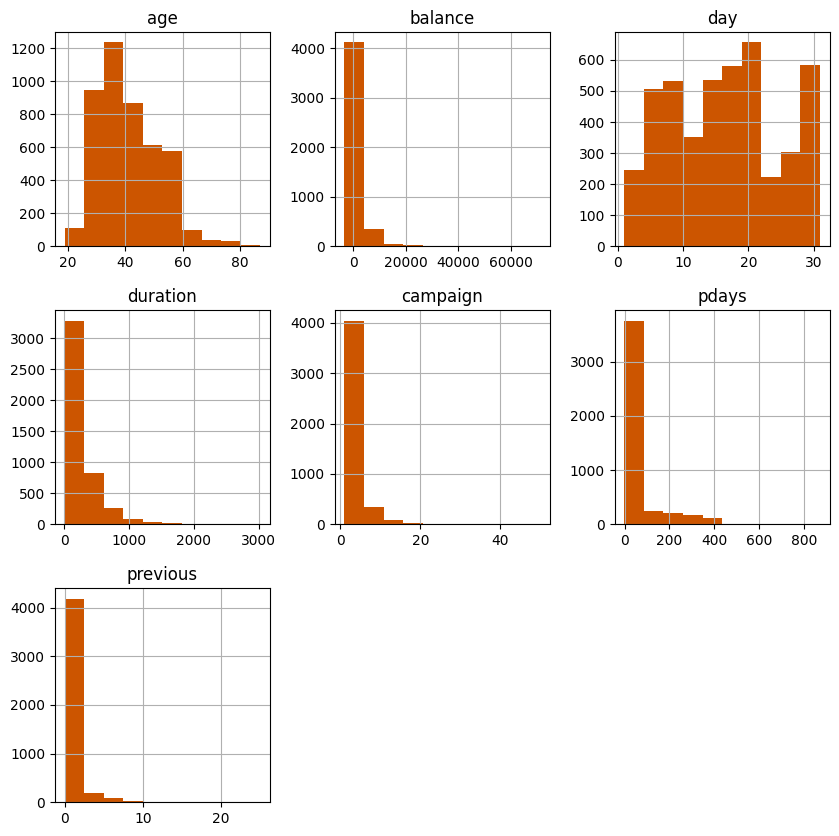

In [8]:
df.hist(figsize=(10,10),color='#cc5500')
plt.show()

C:\Users\HP\AppData\Local\Temp\ipykernel_18684\4178231502.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=feature, data=df, palette='Wistia')


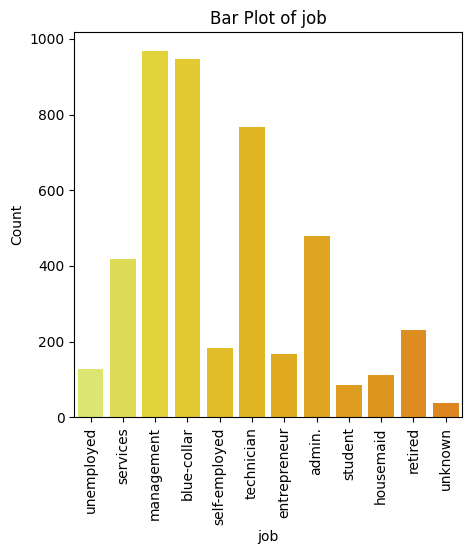

C:\Users\HP\AppData\Local\Temp\ipykernel_18684\4178231502.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=feature, data=df, palette='Wistia')


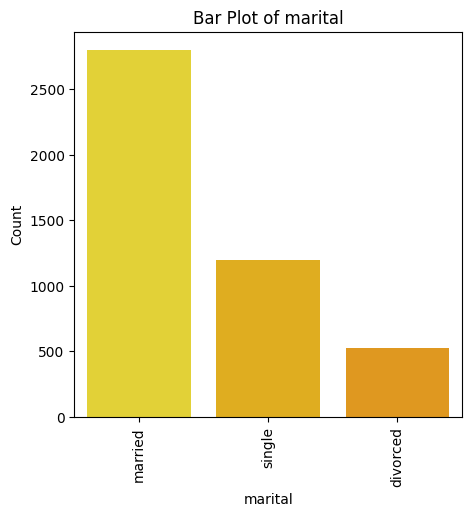

C:\Users\HP\AppData\Local\Temp\ipykernel_18684\4178231502.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=feature, data=df, palette='Wistia')


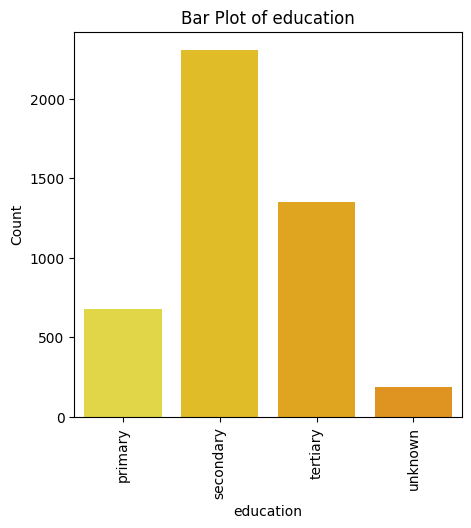

C:\Users\HP\AppData\Local\Temp\ipykernel_18684\4178231502.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=feature, data=df, palette='Wistia')


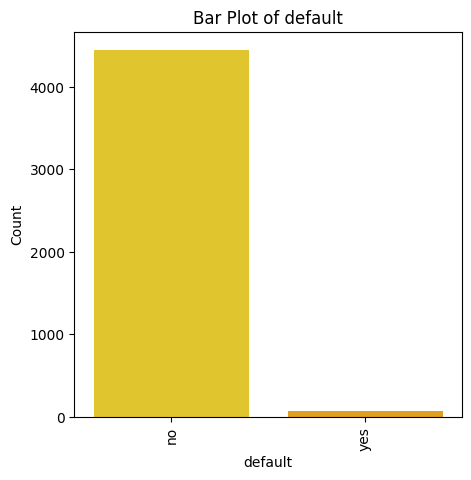

C:\Users\HP\AppData\Local\Temp\ipykernel_18684\4178231502.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=feature, data=df, palette='Wistia')


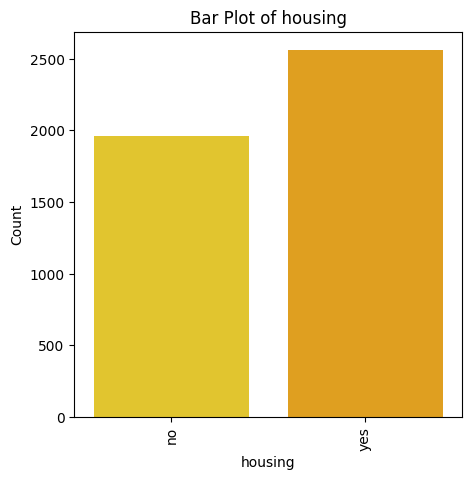

C:\Users\HP\AppData\Local\Temp\ipykernel_18684\4178231502.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=feature, data=df, palette='Wistia')


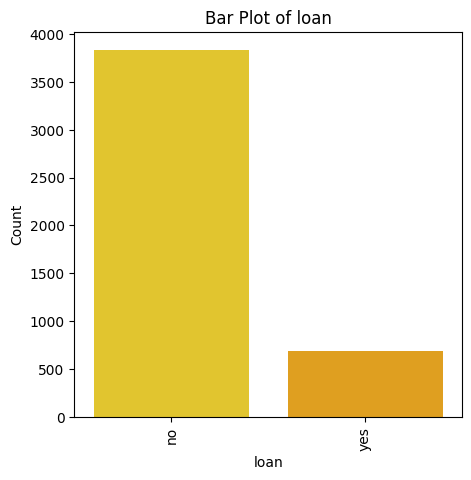

C:\Users\HP\AppData\Local\Temp\ipykernel_18684\4178231502.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=feature, data=df, palette='Wistia')


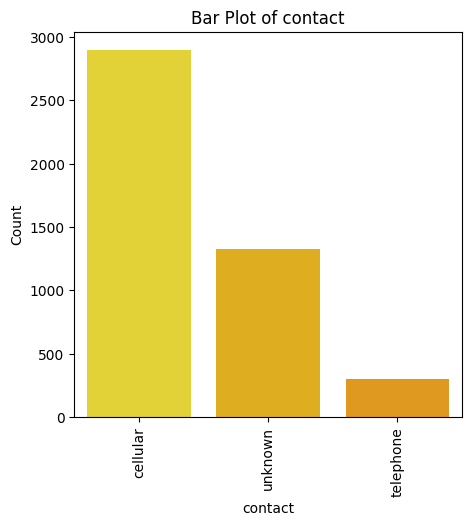

C:\Users\HP\AppData\Local\Temp\ipykernel_18684\4178231502.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=feature, data=df, palette='Wistia')


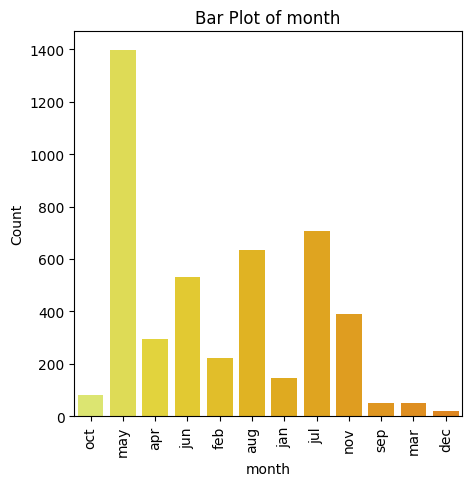

C:\Users\HP\AppData\Local\Temp\ipykernel_18684\4178231502.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=feature, data=df, palette='Wistia')


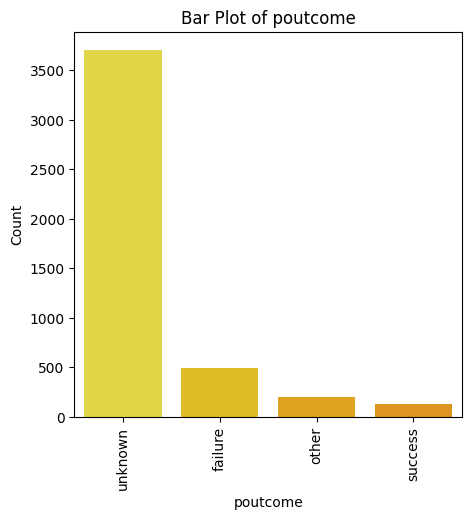

C:\Users\HP\AppData\Local\Temp\ipykernel_18684\4178231502.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=feature, data=df, palette='Wistia')


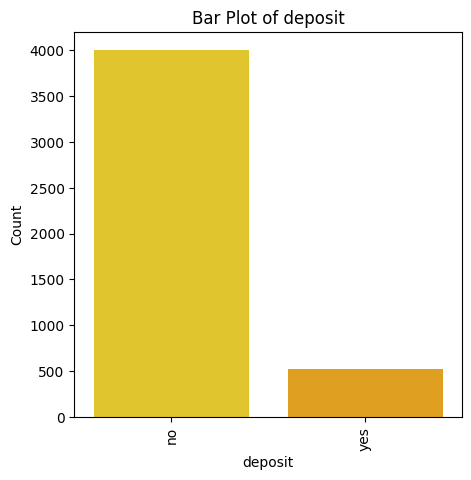

In [53]:
for feature in cat_cols:
    plt.figure(figsize=(5, 5))
    sns.countplot(x=feature, data=df, palette='Wistia')
    plt.title(f'Bar Plot of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.xticks(rotation=90)
    plt.show()


In [20]:
objective_columns = []
numerical_columns = []
for i in df.columns:
    if df[i].dtypes == 'object':
        objective_columns.append(i)
    else:
        numerical_columns.append(i)

In [21]:
print('Columns with objective values: \n',objective_columns)

Columns with objective values: 
 ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome', 'deposit']


In [22]:
print('Columns with numerical values: \n',numerical_columns)

Columns with numerical values: 
 ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']


In [23]:
number_of_unique_values = []
for i in objective_columns :
    number_of_unique_values.append(len(df[i].unique()))
    
print(pd.DataFrame({"columns":objective_columns, "No of unique values":
                   number_of_unique_values}))

     columns  No of unique values
0        job                   12
1    marital                    3
2  education                    4
3    default                    2
4    housing                    2
5       loan                    2
6    contact                    3
7      month                   12
8   poutcome                    4
9    deposit                    2


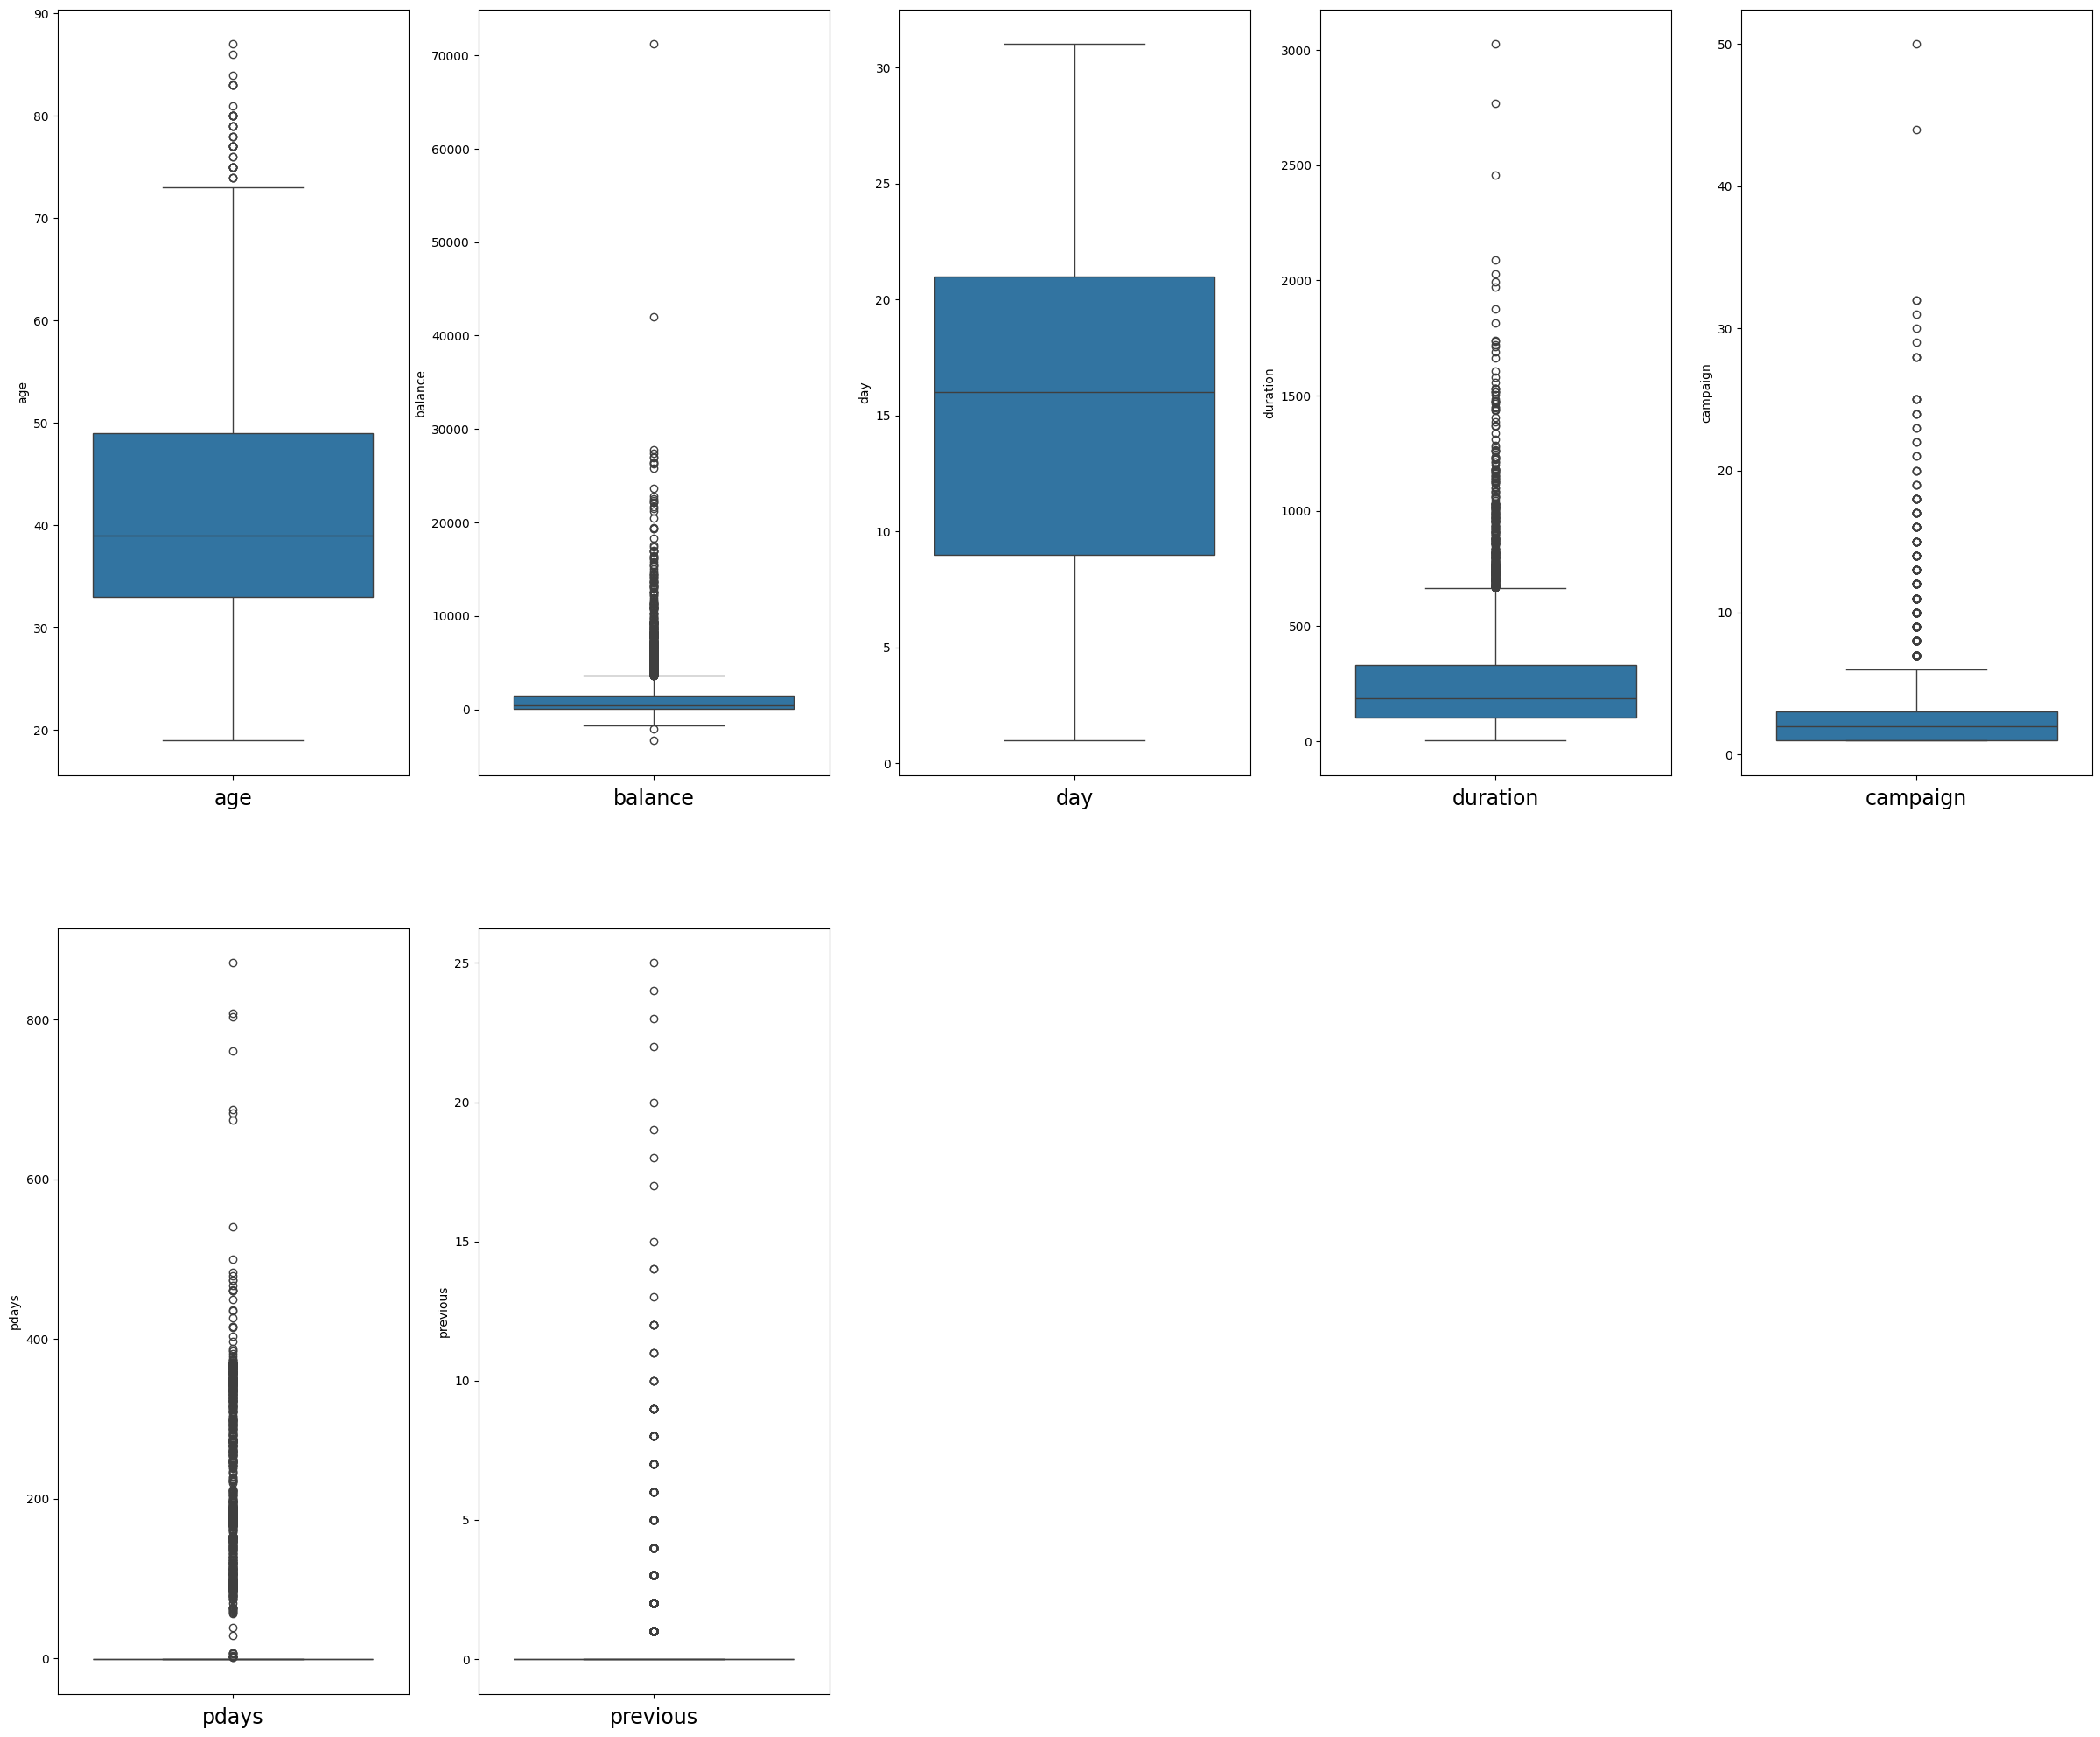

In [28]:
plt.figure(figsize=(30,25))
plot = 1
for i in numerical_columns :
    if plot <= 10:
        ax = plt.subplot(2,5,plot)
        sns.boxplot(df[i])
        plt.xlabel(i,fontsize=17)
    plot +=1
plt.show()

ValueError: '#7b3fOO' is not a valid value for color: supported inputs are (r, g, b) and (r, g, b, a) 0-1 float tuples; '#rrggbb', '#rrggbbaa', '#rgb', '#rgba' strings; named color strings; string reprs of 0-1 floats for grayscale values; 'C0', 'C1', ... strings for colors of the color cycle; and pairs combining one of the above with an alpha value

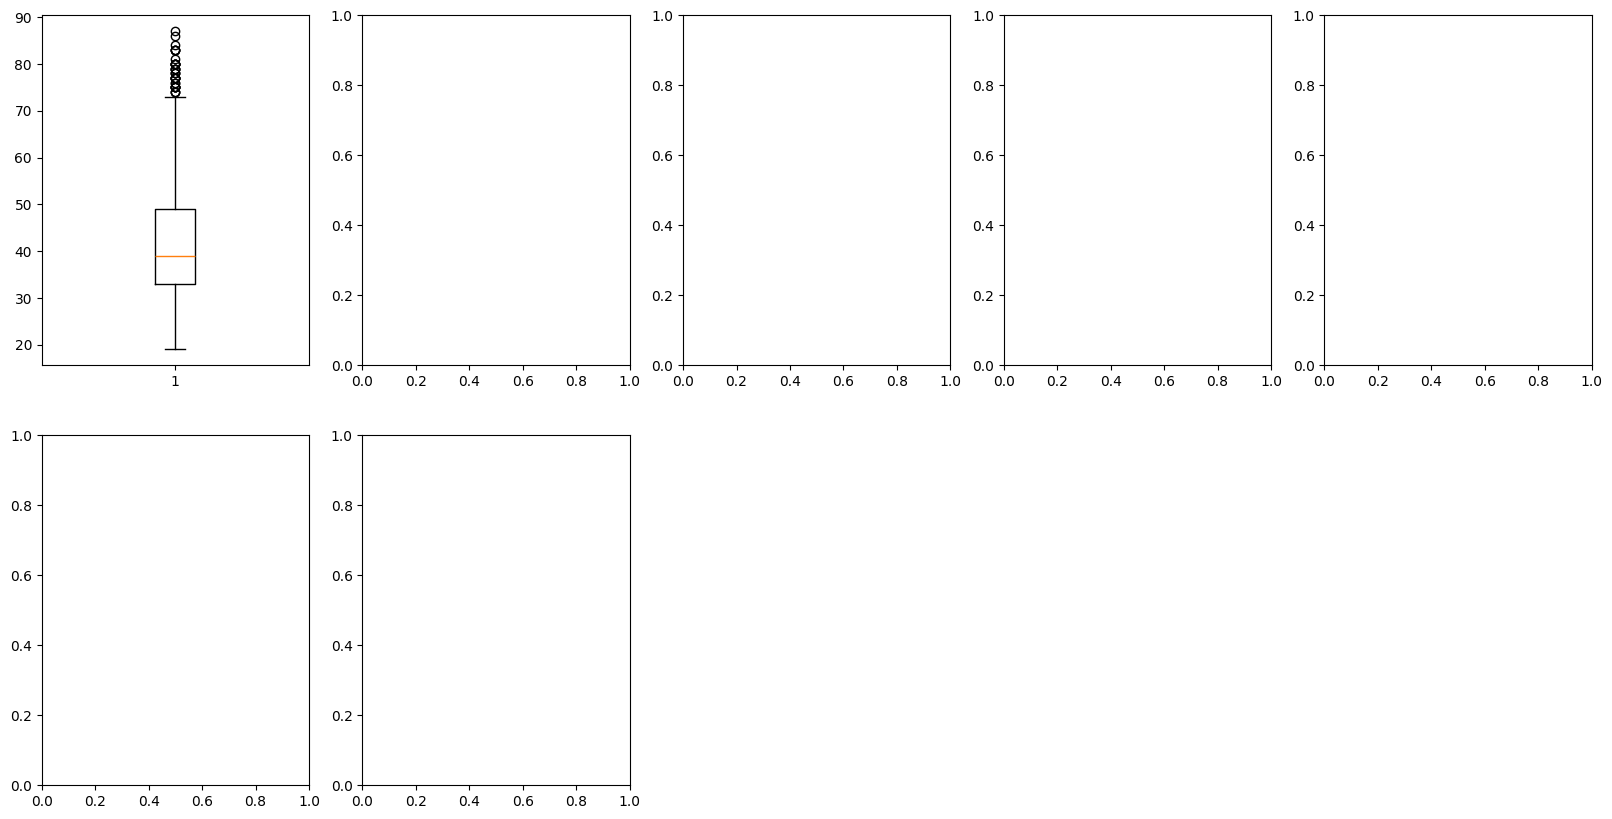

In [15]:
df.plot(kind='box', subplots=True, layout=(2,5),figsize=(20,10),color='#7b3fOO')
plt.show()

In [54]:
import numpy as np


columns = ['age', 'campaign', 'duration']


for col in columns:
    q1 = np.percentile(df[col], 25)
    q3 = np.percentile(df[col], 75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    
    
    df = df[(df[col] > lower_bound) & (df[col] < upper_bound)]


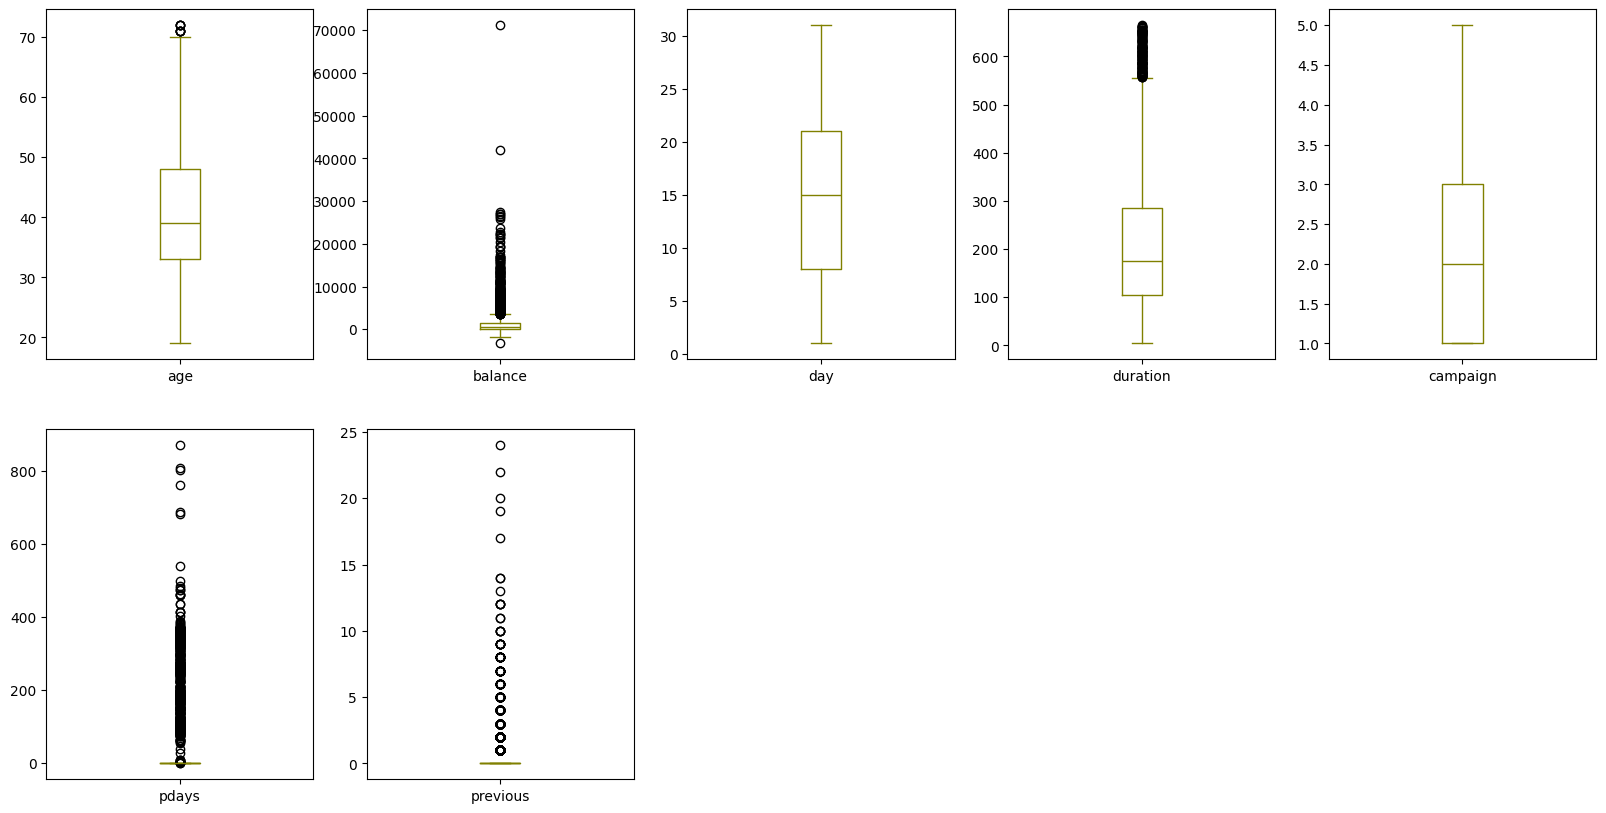

In [56]:
import matplotlib.pyplot as plt


df.plot(kind='box', subplots=True, layout=(2, 5), figsize=(20, 10), color='#808000')
plt.show()


In [68]:
corr = df.corr()
print(corr)
corr = corr[abs(corr)>=0.90]
sns.heatmap(corr,annot=True,cmap='Set3',linewidth=0.2)
plt.show()

In [28]:
high_corr_cols = ['emp.var.rate','euribor3m','nr.employed']

In [29]:
df1 = df.copy()
df1.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'deposit'],
      dtype='object')

In [32]:
df1.drop(high_corr_cols,inplace=True,axis=1)
df1.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'deposit'],
      dtype='object')

In [31]:
df1.shape

(4521, 17)

In [33]:
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()
df_encoded = df1.apply(lb.fit_transform)
df_encoded

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,11,10,1,0,0,1475,0,0,0,18,10,75,0,0,0,3,0
1,14,7,1,1,0,2030,1,1,0,10,8,216,0,228,4,0,0
2,16,4,2,2,0,1303,1,0,0,15,0,181,0,219,1,0,0
3,11,4,1,2,0,1352,1,1,2,2,6,195,3,0,0,3,0
4,40,1,1,1,0,274,1,0,2,4,8,222,0,0,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,14,7,1,1,0,119,1,0,0,29,5,325,4,0,0,3,0
4517,38,6,1,2,1,0,1,1,2,8,8,149,0,0,0,3,0
4518,38,9,1,1,0,558,0,0,0,18,1,147,10,0,0,3,0
4519,9,1,1,1,0,1187,0,0,0,5,3,125,3,140,3,1,0


In [34]:
df_encoded['deposit'].value_counts()

deposit
0    4000
1     521
Name: count, dtype: int64

In [35]:
x = df_encoded.drop('deposit',axis=1)
y = df_encoded['deposit']
print(x.shape)
print(y.shape)
print(type(x))
print(type(y))

(4521, 16)
(4521,)
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>


In [37]:
from sklearn.model_selection import train_test_split

print(4119*0.25)

1029.75


In [38]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=1)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(3390, 16)
(1131, 16)
(3390,)
(1131,)


In [39]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

def eval_model(y_test,y_pred):
    acc = accuracy_score(y_test,y_pred)
    print('Accuracy_Score',acc)
    cm = confusion_matrix(y_test,y_pred)
    print('Confusion Matrix\n', cm)
    print('Classification Report\n',classification_report(y_test,y_pred))
    
def mscore(model):
    train_score = model.score(x_train,y_train)
    test_score = model.score(x_test,y_test)
    print('Training Score',train_score)
    print('Testing Score',test_score)

In [60]:
from sklearn.tree import DecisionTreeClassifier


dt = DecisionTreeClassifier(criterion='gini', max_depth=5, min_samples_split=10)


dt.fit(x_train, y_train)


DecisionTreeClassifier(max_depth=5, min_samples_split=10)

In [62]:
mscore(dt)

Training Score 0.9235988200589971
Testing Score 0.883289124668435


In [63]:
ypred_dt = dt.predict(x_test)
print(ypred_dt)

[0 0 0 ... 0 0 0]


In [67]:
eval-model(y_test,y_pred_dt)

In [45]:
from sklearn.tree import plot_tree

In [46]:
cn = ['no','yes']
fn = x_train.columns
print(fn)
print(cn)

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome'],
      dtype='object')
['no', 'yes']


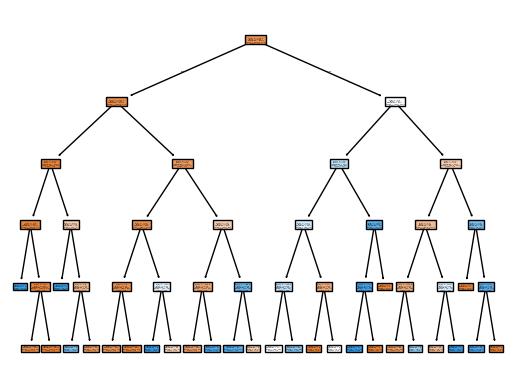

In [66]:
plot_tree(dt,class_names=cn,filled=True)
plt.show()

In [48]:
dt1 = DecisionTreeClassifier(criterion='entropy',max_depth=4,min_samples_split=15)
dt1.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4, min_samples_split=15)

In [49]:
mscore(dt1)

Training Score 0.9100294985250738
Testing Score 0.883289124668435


In [50]:
ypred_dt1 = dt1.predict(x_test)

In [51]:
eval_model(y_test,ypred_dt1)

Accuracy_Score 0.883289124668435
Confusion Matrix
 [[950  38]
 [ 94  49]]
Classification Report
               precision    recall  f1-score   support

           0       0.91      0.96      0.94       988
           1       0.56      0.34      0.43       143

    accuracy                           0.88      1131
   macro avg       0.74      0.65      0.68      1131
weighted avg       0.87      0.88      0.87      1131



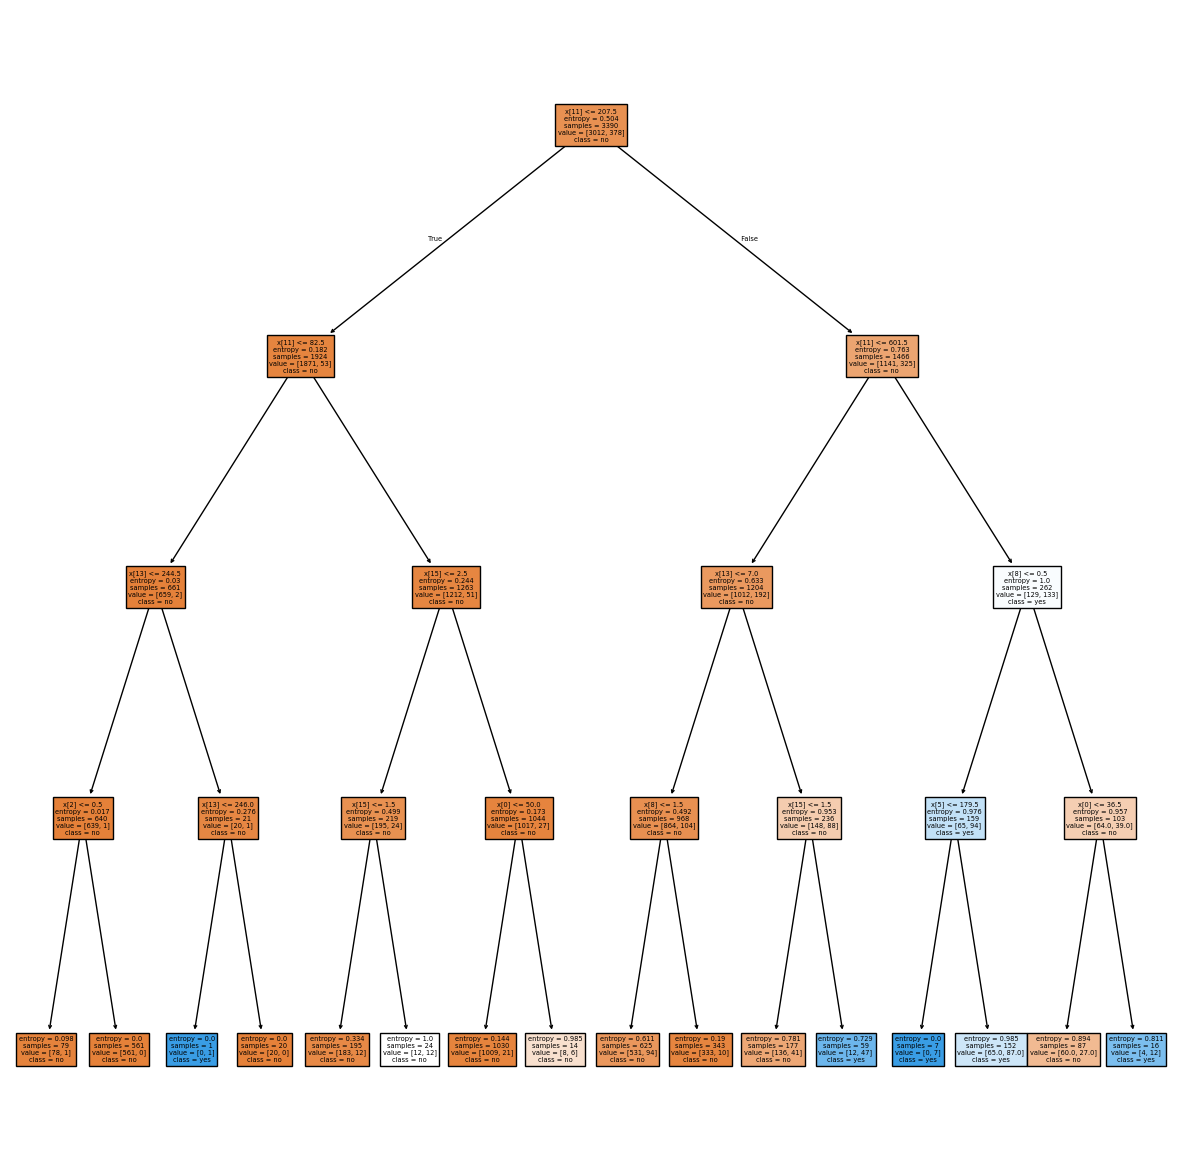

In [52]:
plt.figure(figsize=(15,15))
plot_tree(dt1,class_names=cn,filled=True)
plt.show()